<a href="https://colab.research.google.com/github/cameronliddle/Algorithms/blob/main/AirQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 | Introduction
Air pollution is one of the most pressing environmental and public health challenges of our time, with PM2.5 (particulate matter less than 2.5 micrometers in diameter) being one of the most harmful pollutants. Due to its small size, PM2.5 can penetrate deep into the lungs and bloodstream, causing severe health issues such as respiratory and cardiovascular diseases. Long-term exposure to elevated PM2.5 levels has been linked to premature mortality, particularly among vulnerable populations such as children, the elderly, and those with pre-existing conditions.

The environmental impact of PM2.5 pollution is equally concerning. It contributes to reduced visibility (haze), affects ecosystems, and exacerbates climate change by acting as a short-lived climate forcer. Urban areas, in particular, are heavily impacted by PM2.5 due to industrial emissions, vehicular traffic, and seasonal variations.

## 1.1 | Importance of the Study
The urgency of addressing PM2.5 pollution is underscored by its rapid fluctuations influenced by both human activities and meteorological factors. Key motivations for this study include:

Public Health: Chronic exposure to PM2.5 can worsen respiratory and cardiovascular conditions, disproportionately affecting at-risk groups.
Policy Relevance: Identifying temporal patterns and pollution peaks allows policymakers to design timely interventions.
Environmental Conservation: Understanding the drivers of PM2.5 pollution contributes to sustainable urban planning and mitigation strategies.
This study focuses on specific locations with significant PM2.5 levels to provide actionable insights into the factors influencing air quality and to develop robust forecasting tools.

## 1.2 | Problem Statement and Methodology
### 1.2.1 Problem Statement
PM2.5 pollution poses an immediate threat to both human health and the environment. Its levels are highly dynamic, influenced by seasonal, meteorological, and anthropogenic factors. Accurately forecasting PM2.5 levels is critical for timely interventions and effective air quality management.

### 1.2.2 Proposal
This project aims to analyze and predict PM2.5 concentrations using advanced statistical and machine learning models. By focusing on specific geographic locations, the study seeks to:

Identify the key factors driving PM2.5 variations.
Develop forecasting models to predict PM2.5 levels.
Provide data-driven recommendations for mitigating the impacts of PM2.5 pollution.
### 1.2.3 Methodology
The following approaches will be employed to achieve the study’s objectives:

Exploratory Data Analysis (EDA): Examine seasonal trends, temporal patterns, and correlations between PM2.5 and meteorological factors such as temperature, wind speed, and pressure.
Modeling Techniques:
ARIMA: A baseline statistical model for short-term PM2.5 forecasting.
SARIMAX: Extends ARIMA to capture seasonality and include meteorological variables as exogenous predictors.
Holt-Winters: Provides quick, interpretable results for seasonal PM2.5 trends.
LSTM (Long Short-Term Memory Networks): A deep learning model for capturing long-term dependencies and non-linear relationships in the data.
Evaluation and Forecasting:
Use metrics such as MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) to compare model performance.
Generate forecasts to predict future PM2.5 levels and identify potential pollution peaks.
By combining these methods, this study aims to provide a comprehensive understanding of PM2.5 dynamics and create reliable forecasting tools to guide policy interventions.

## 1.3 | Focus and Objectives
This study centers on the temporal and meteorological drivers of PM2.5 pollution at selected urban locations. Its primary objectives are to:

Conduct a comprehensive exploratory analysis of PM2.5 data to uncover trends, patterns, and anomalies.
Develop and compare models to identify the most accurate forecasting approach.
Generate actionable insights for policymakers, enabling timely interventions to reduce public health risks and environmental damage.
## 1.4 | Project Summary and Expected Outcomes
This project offers a data-driven approach to analyzing and forecasting PM2.5 pollution. The key expected outcomes include:

Identification of key temporal and meteorological factors influencing PM2.5 levels.
Development of robust statistical and machine learning models for accurate PM2.5 forecasting.
Actionable insights for policy and decision-making, including recommendations for mitigating peak pollution periods.
By providing reliable forecasts and actionable insights, this study seeks to empower policymakers, environmental agencies, and urban planners to combat the adverse impacts of PM2.5 pollution effectively.

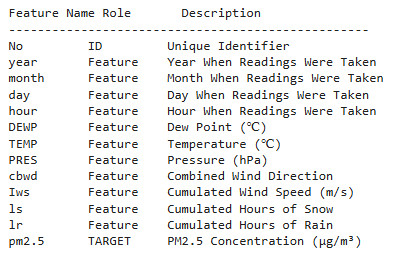

In [74]:
from google.colab import drive
drive.mount('/content/drive')

# Path to your dataset
file_path = '/content/drive/MyDrive/Bejing/data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd

# Load the dataset (assuming the file is a CSV)
df = pd.read_csv('/content/drive/MyDrive/Bejing/data.csv')

# Display the first few rows to inspect the structure
df.head()


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [76]:
# Get information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [77]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)


In [78]:
df['pm2.5'] = df['pm2.5'].interpolate(method='time')  # Fill missing values with time-based interpolation


In [79]:
#Checking Null values in pm2.5
df.drop('No', axis=1, inplace=True)
train, test = df[~df['pm2.5'].isnull()], df[df['pm2.5'].isnull()]
train.shape, test.shape

((43800, 12), (24, 12))

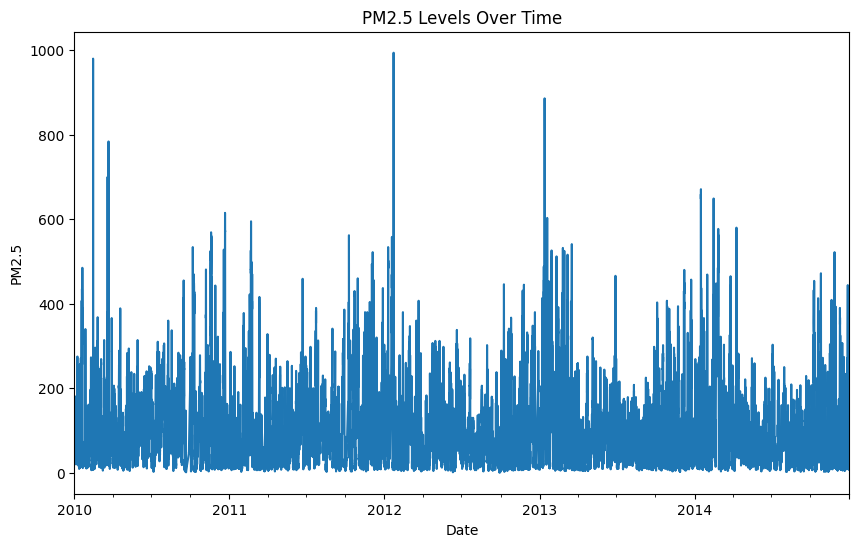

In [80]:
df['pm2.5'].plot(title='PM2.5 Levels Over Time', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.show()


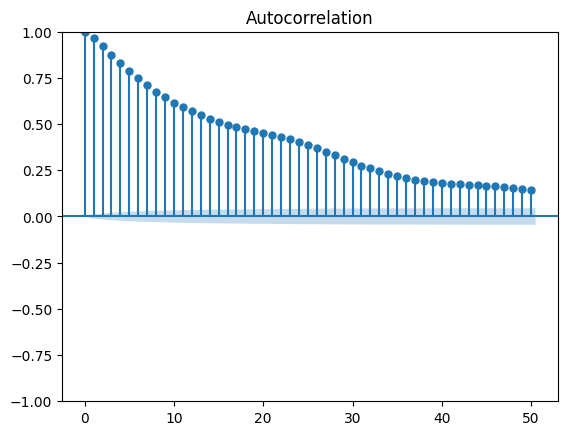

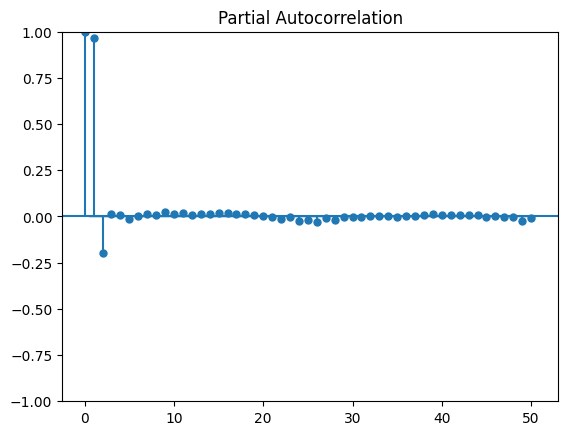

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['pm2.5'].dropna(), lags=50)
plot_pacf(df['pm2.5'].dropna(), lags=50)
plt.show()


In [82]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['pm2.5'], order=(1, 1, 1))  # Replace with your column and (p, d, q)
fitted_model = model.fit()

print(fitted_model.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  pm2.5   No. Observations:                43824
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -200038.335
Date:                Wed, 01 Jan 2025   AIC                         400082.670
Time:                        22:00:52   BIC                         400108.734
Sample:                    01-01-2010   HQIC                        400090.884
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0291      0.006      5.130      0.000       0.018       0.040
ma.L1          0.1570      0.005     28.549      0.000       0.146       0.168
sigma2       542.5094      0.542   1000.542      0.0

<ipython-input-83-6f77348dd6e3>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')


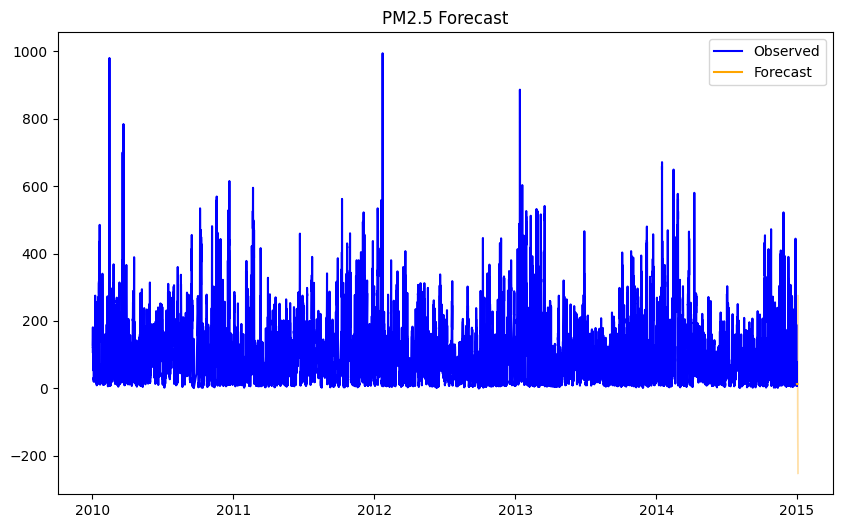

In [83]:
forecast = fitted_model.get_forecast(steps=24)  # Forecast next 24 hours
forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['pm2.5'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.legend()
plt.title("PM2.5 Forecast")
plt.show()


In [84]:
train.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0


<ipython-input-85-d62cacad85b2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x='cbwd', y='pm2.5', palette='flare')


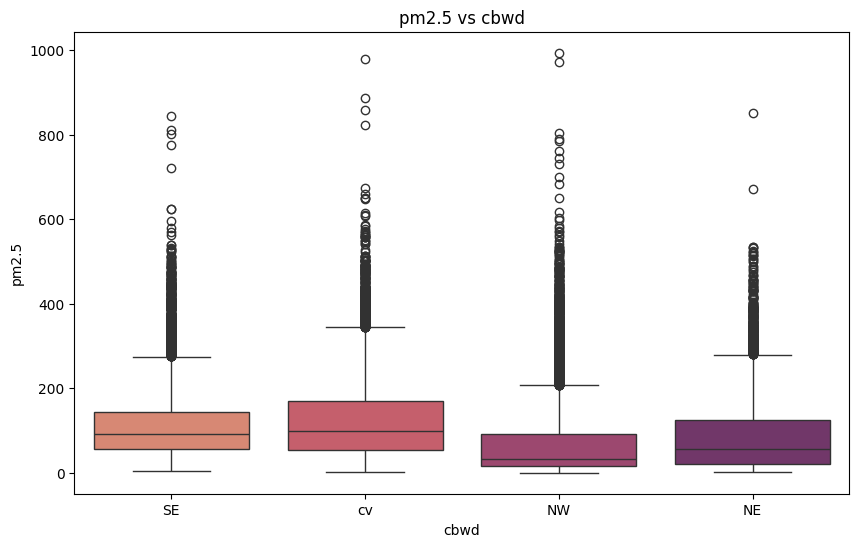

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('pm2.5 vs cbwd')
sns.boxplot(data=train, x='cbwd', y='pm2.5', palette='flare')
plt.show()

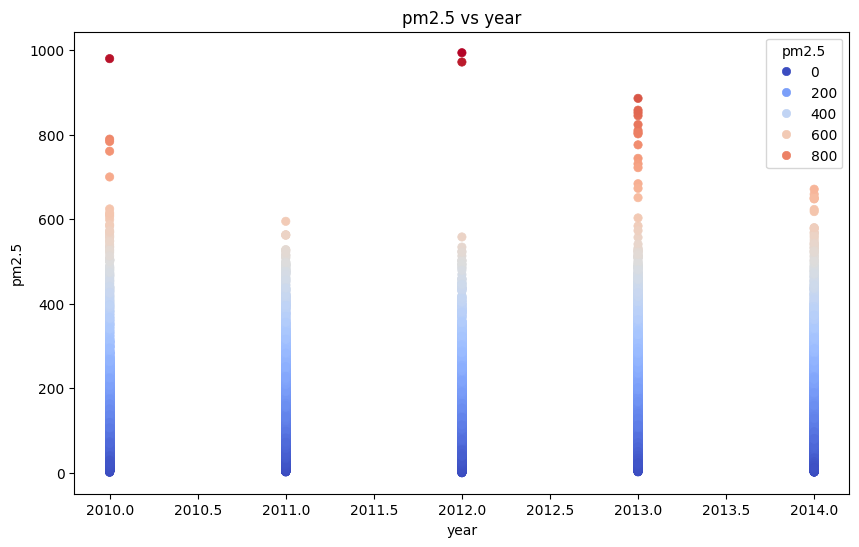

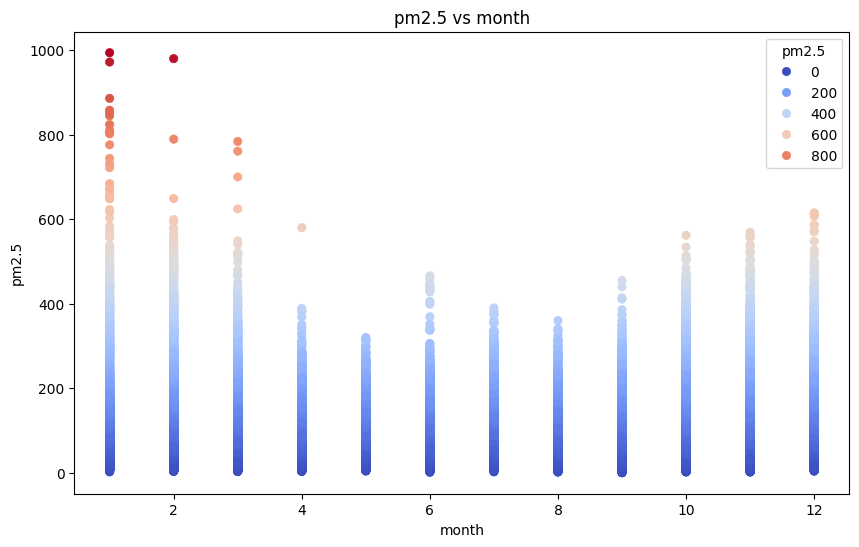

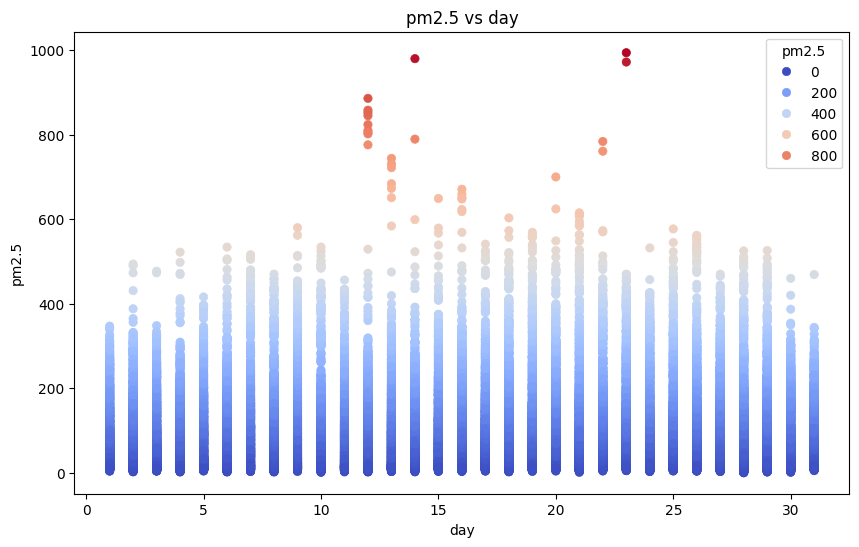

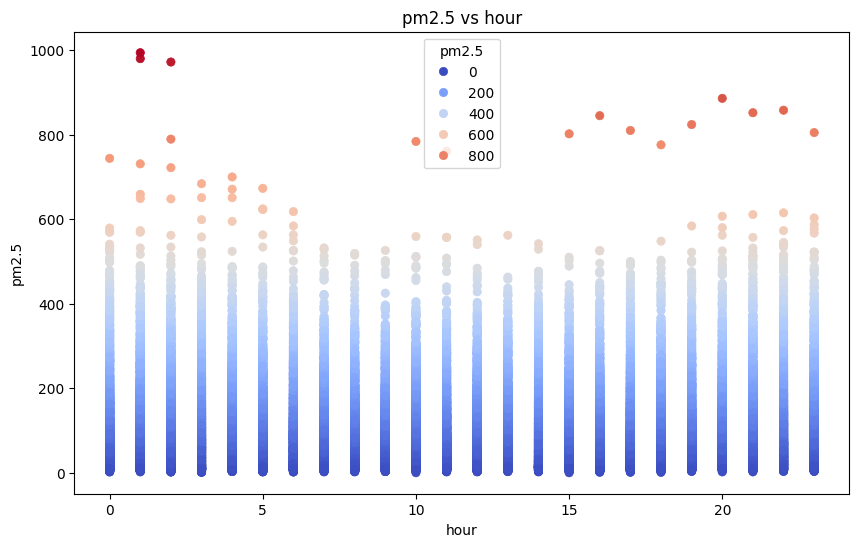

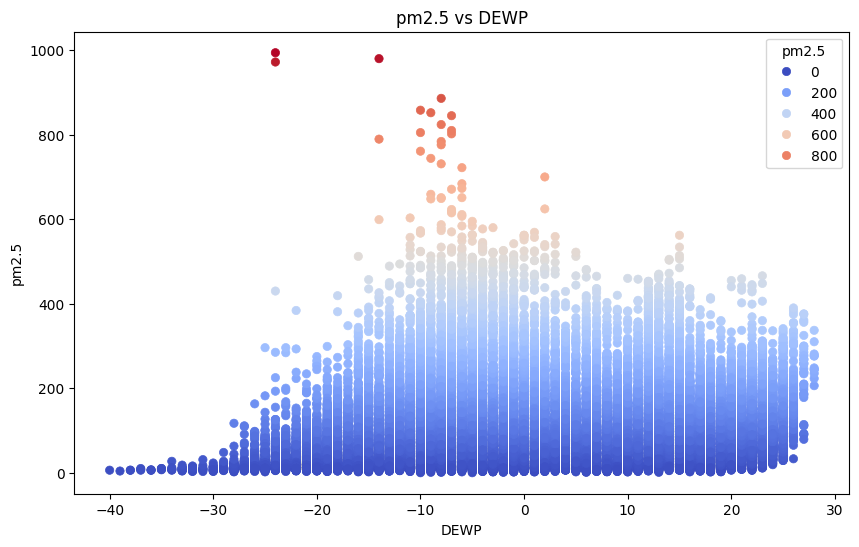

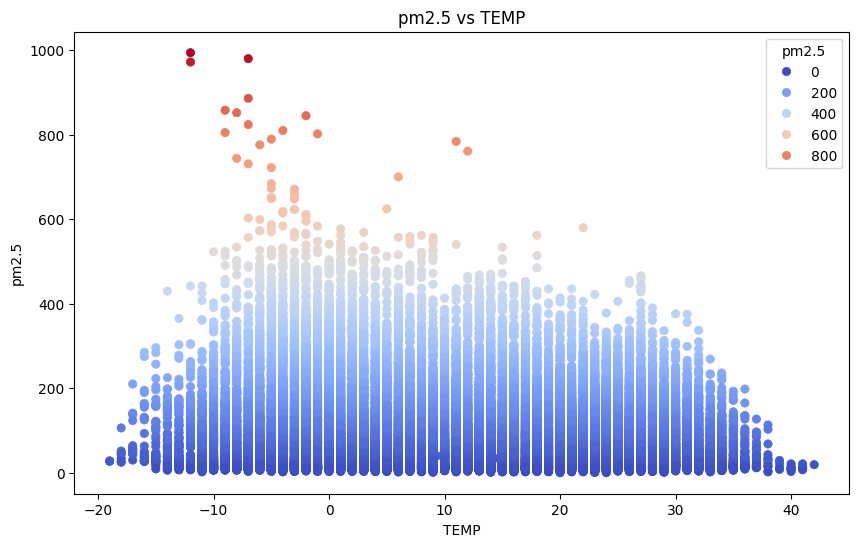

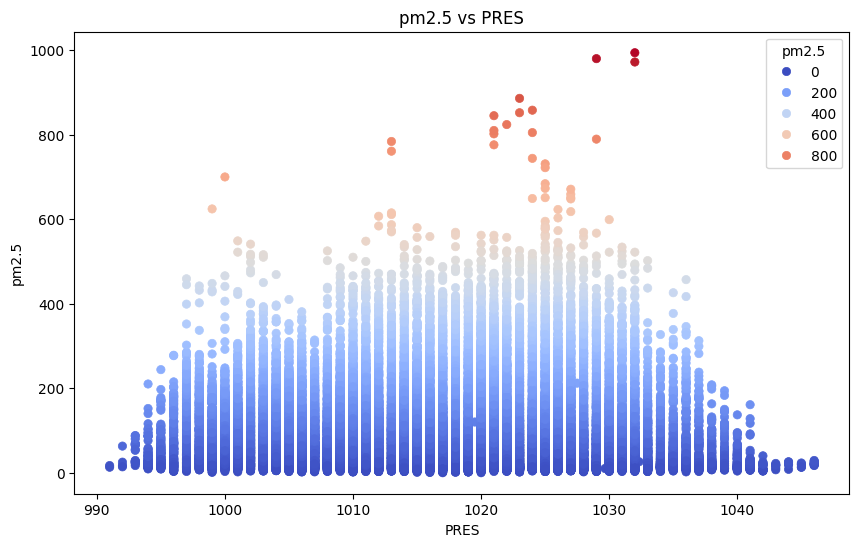

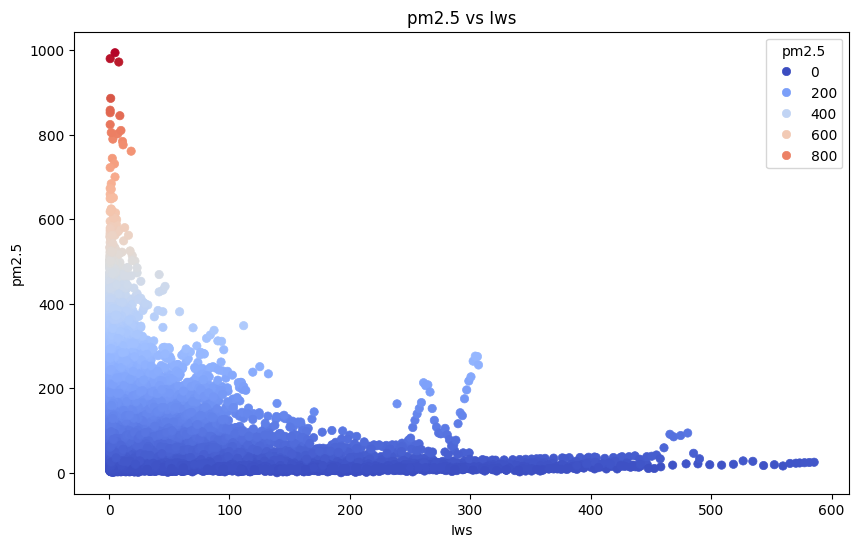

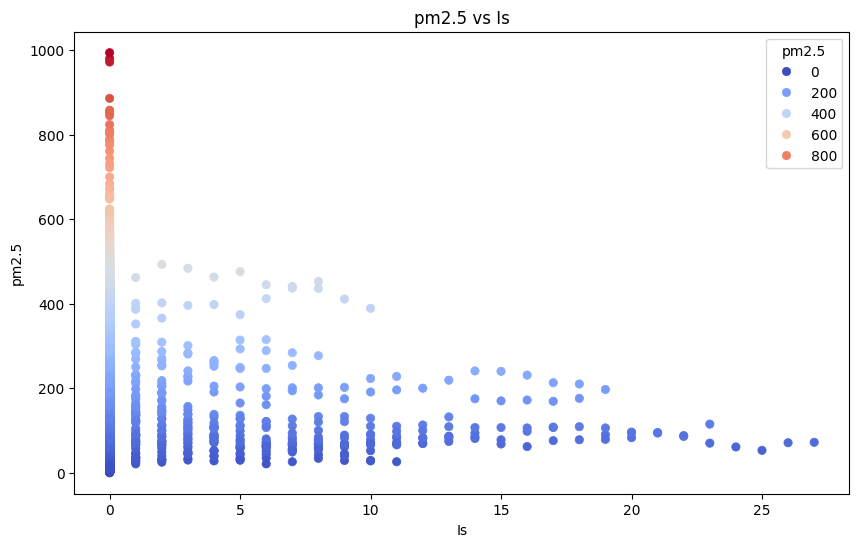

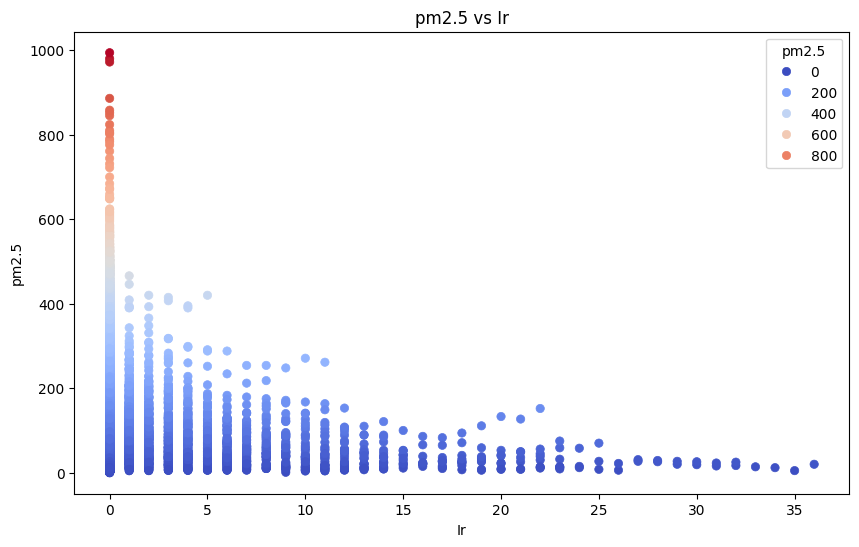

In [86]:
# Loop through all columns except 'pm2.5' and 'cbwd'
for col in train.drop(['pm2.5', 'cbwd'], axis=1).columns:
    plt.figure(figsize=(10, 6))
    plt.title(f'pm2.5 vs {col}')

    # Plot the scatter plot with a continuous color map for better visualization
    sns.scatterplot(data=train, x=col, y='pm2.5', hue='pm2.5', palette='coolwarm', edgecolor=None)

    plt.show()


In [87]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['cbwd'] = le.fit_transform(train['cbwd'])
test['cbwd'] = le.transform(test['cbwd'])

train.head()

<ipython-input-87-3b38421f00c5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['cbwd'] = le.fit_transform(train['cbwd'])
<ipython-input-87-3b38421f00c5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cbwd'] = le.transform(test['cbwd'])


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,,,,,
2010-01-02 00:00:00,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0


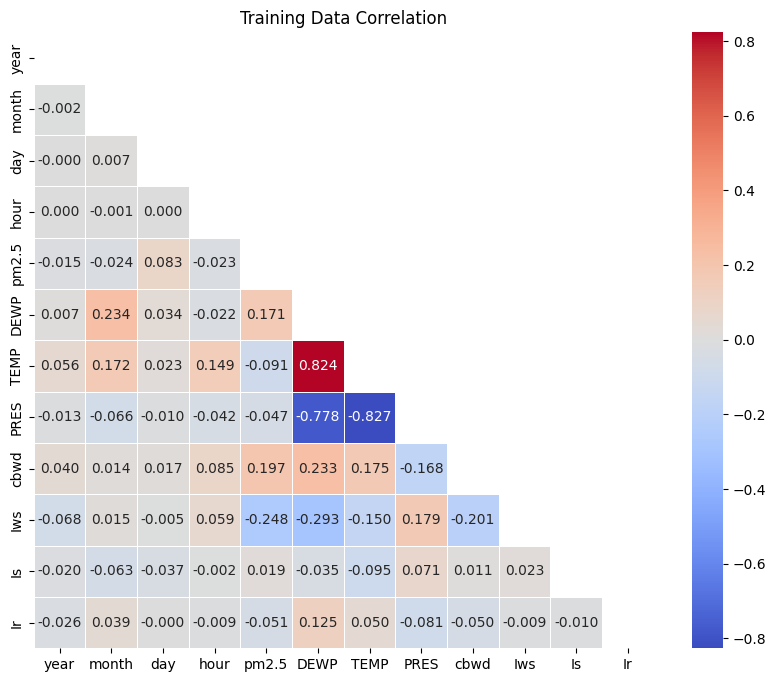

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out non-numeric columns for correlation calculation
numeric_columns = train.select_dtypes(include=['number']).columns

# Calculate the correlation matrix
corr_matrix = train[numeric_columns].corr()

# Mask the upper triangle of the correlation matrix (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, mask=mask)

# Title and display
plt.title('Training Data Correlation')
plt.show()


In [89]:
X = train.drop('pm2.5', axis=1)
y = train['pm2.5']

X.shape, y.shape

((43800, 11), (43800,))

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=0)

X_train.shape, X_valid.shape

((35040, 11), (8760, 11))

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)

print(f'r2 score : {r2_score(y_valid, preds) * 100:.2f}%')
print(f'MAE score : {mean_absolute_error(y_valid, preds)}')
print(f'MSE score : {mean_squared_error(y_valid, preds)}')

r2 score : 84.07%
MAE score : 22.44099772797261
MSE score : 1351.2821276185568


In [92]:
X_test = test.drop('pm2.5', axis=1)

test_preds = model.predict(X_test)

test['pm2.5'] = test_preds

test['cbwd'] = le.inverse_transform(test['cbwd'])

test.head()

<ipython-input-92-c02a0e9be7f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pm2.5'] = test_preds
<ipython-input-92-c02a0e9be7f7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cbwd'] = le.inverse_transform(test['cbwd'])


,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
datetime,,,,,,,,,,,,
2010-01-01 00:00:00,2010,1,1,0,144.450000,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2010,1,1,1,172.800000,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,2010,1,1,2,125.982245,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,2010,1,1,3,109.070000,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,2010,1,1,4,95.132422,-20,-12.0,1018.0,NW,12.97,0,0


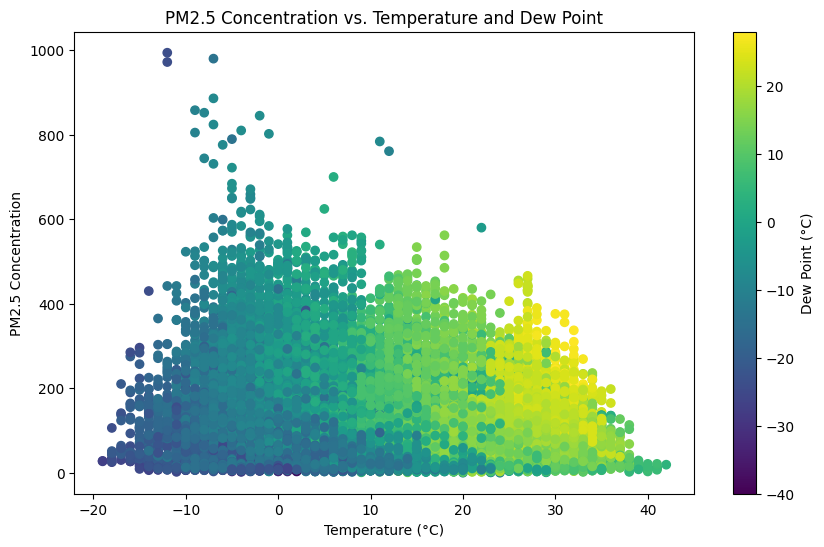

In [93]:
# @title PM2.5 Concentration vs. Temperature and Dew Point

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df'

plt.figure(figsize=(10, 6))
plt.scatter(df['TEMP'], df['pm2.5'], c=df['DEWP'], cmap='viridis')
plt.xlabel('Temperature (°C)')
plt.ylabel('PM2.5 Concentration')
plt.title('PM2.5 Concentration vs. Temperature and Dew Point')
_ = plt.colorbar(label='Dew Point (°C)')

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Bejing/data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [95]:
df = pd.read_csv("/content/drive/MyDrive/Bejing/data.csv")
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [18]:
df['Date'] = pd.to_datetime(df[['year','month','day','hour']])

In [19]:
df_pm25 = df[df['pm2.5'].isnull() == False]
df_pm25_testdata = df[df['pm2.5'].isnull() == True]

df_pm25.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


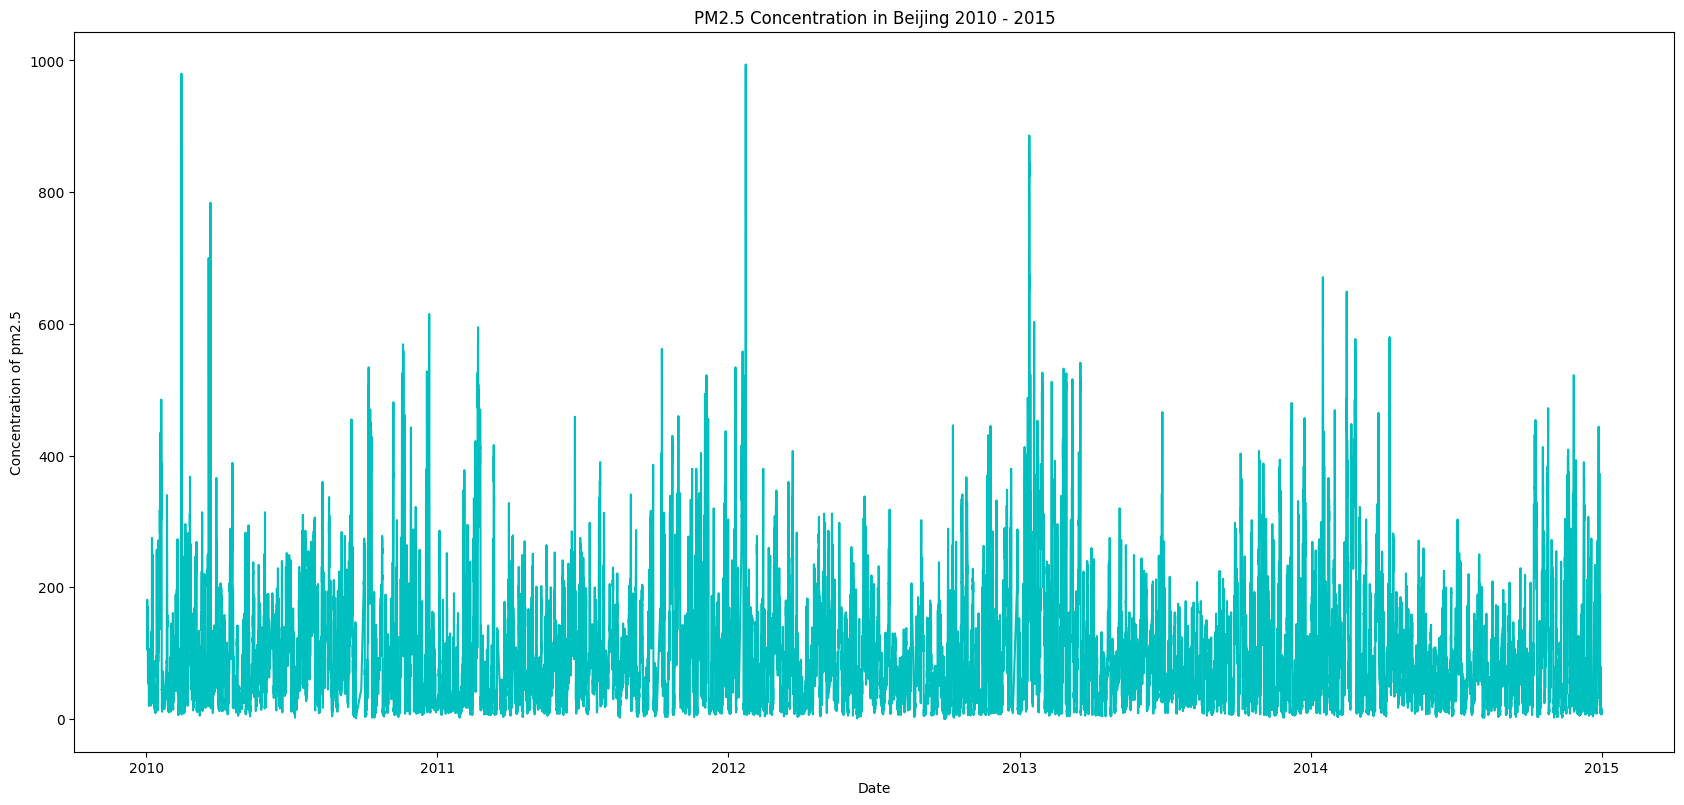

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.plot(df_pm25['Date'],df_pm25['pm2.5'],'c')
plt.xlabel('Date')
plt.ylabel('Concentration of pm2.5')
plt.title('PM2.5 Concentration in Beijing 2010 - 2015')
plt.show()

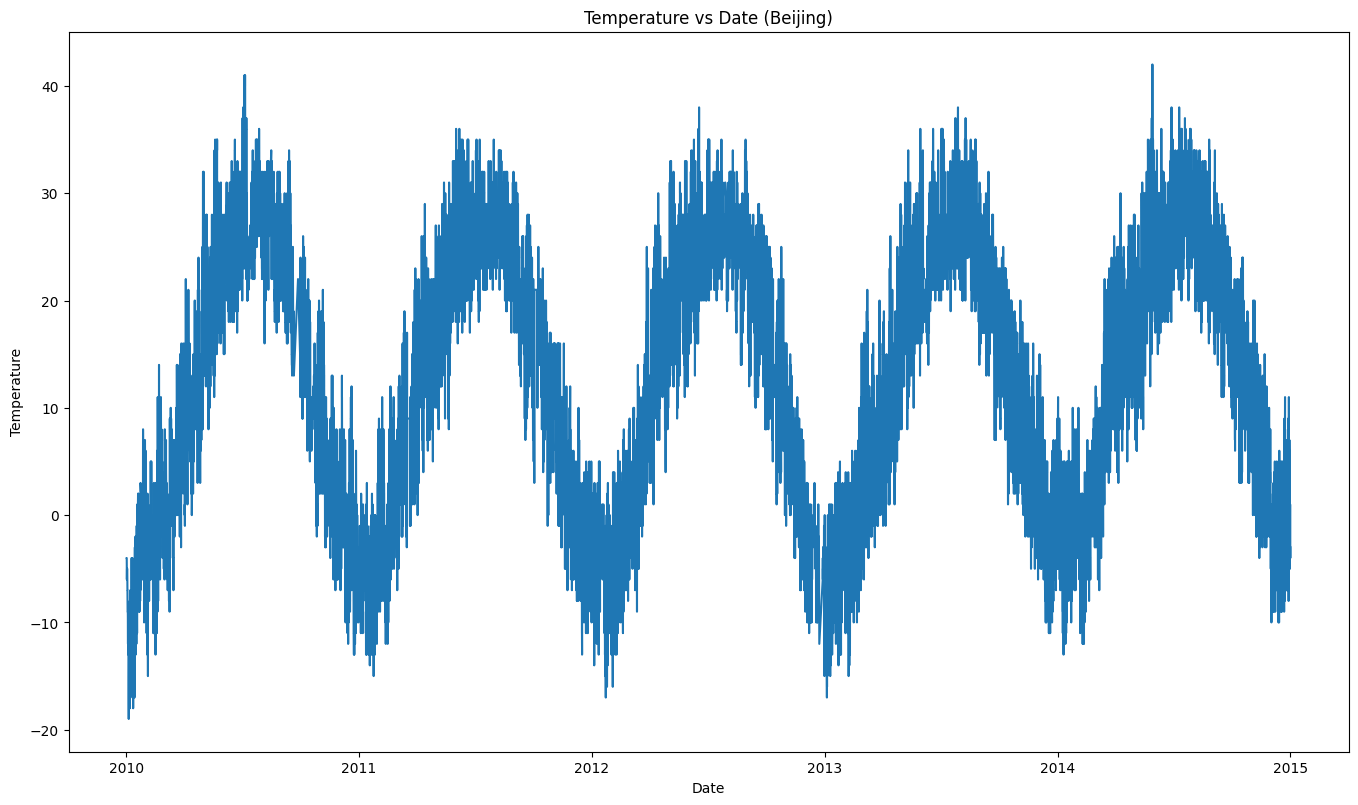

In [21]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.5])
ax.plot(df_pm25['Date'],df_pm25['TEMP'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Temperature vs Date (Beijing)')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])

df_pm25.head()

<ipython-input-22-c7c92a4c171f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0,2010-01-02 04:00:00


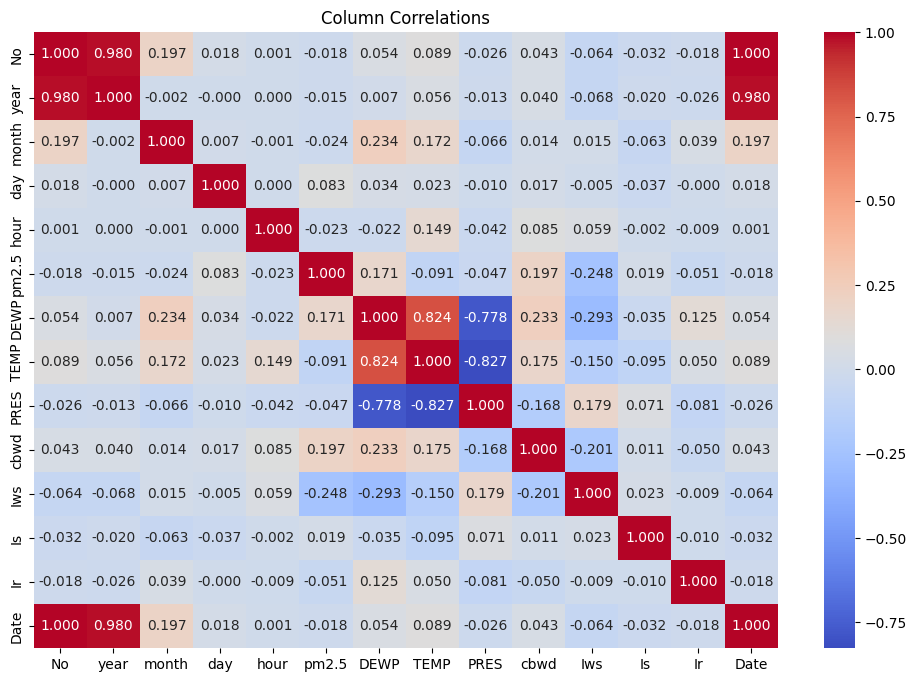

In [26]:
plt.figure(figsize=(12,8))
plt.title('Column Correlations')
sns.heatmap(df_pm25.corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

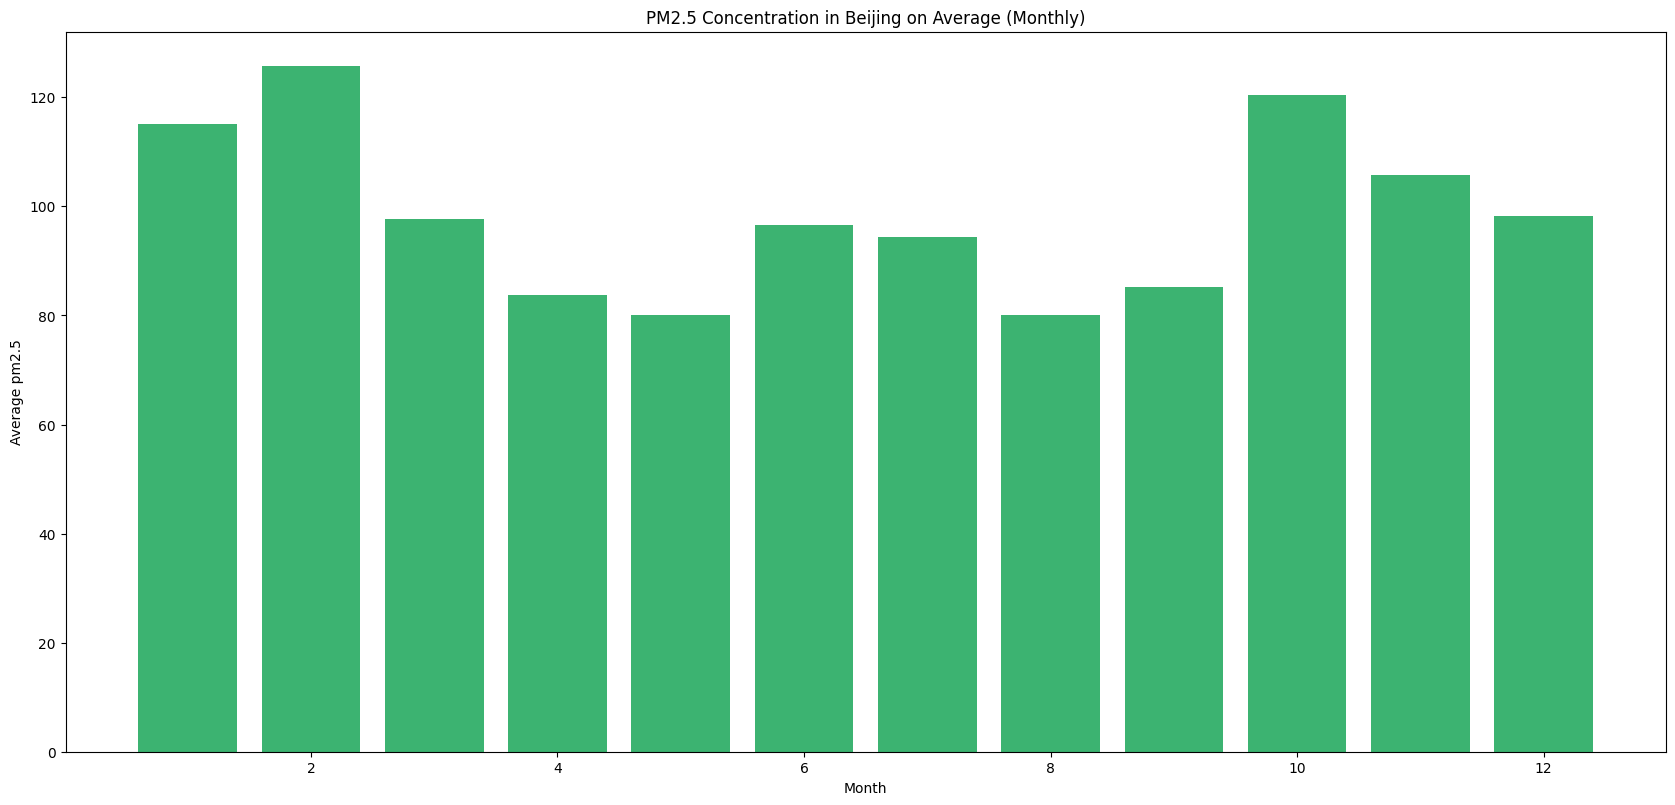

In [24]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.bar(df_pm25['Date'].dt.month.unique(),df_pm25.groupby(df_pm25['Date'].dt.month).mean()['pm2.5'], color = 'mediumseagreen')
plt.xlabel('Month')
plt.ylabel('Average pm2.5')
plt.title('PM2.5 Concentration in Beijing on Average (Monthly)')
plt.show()

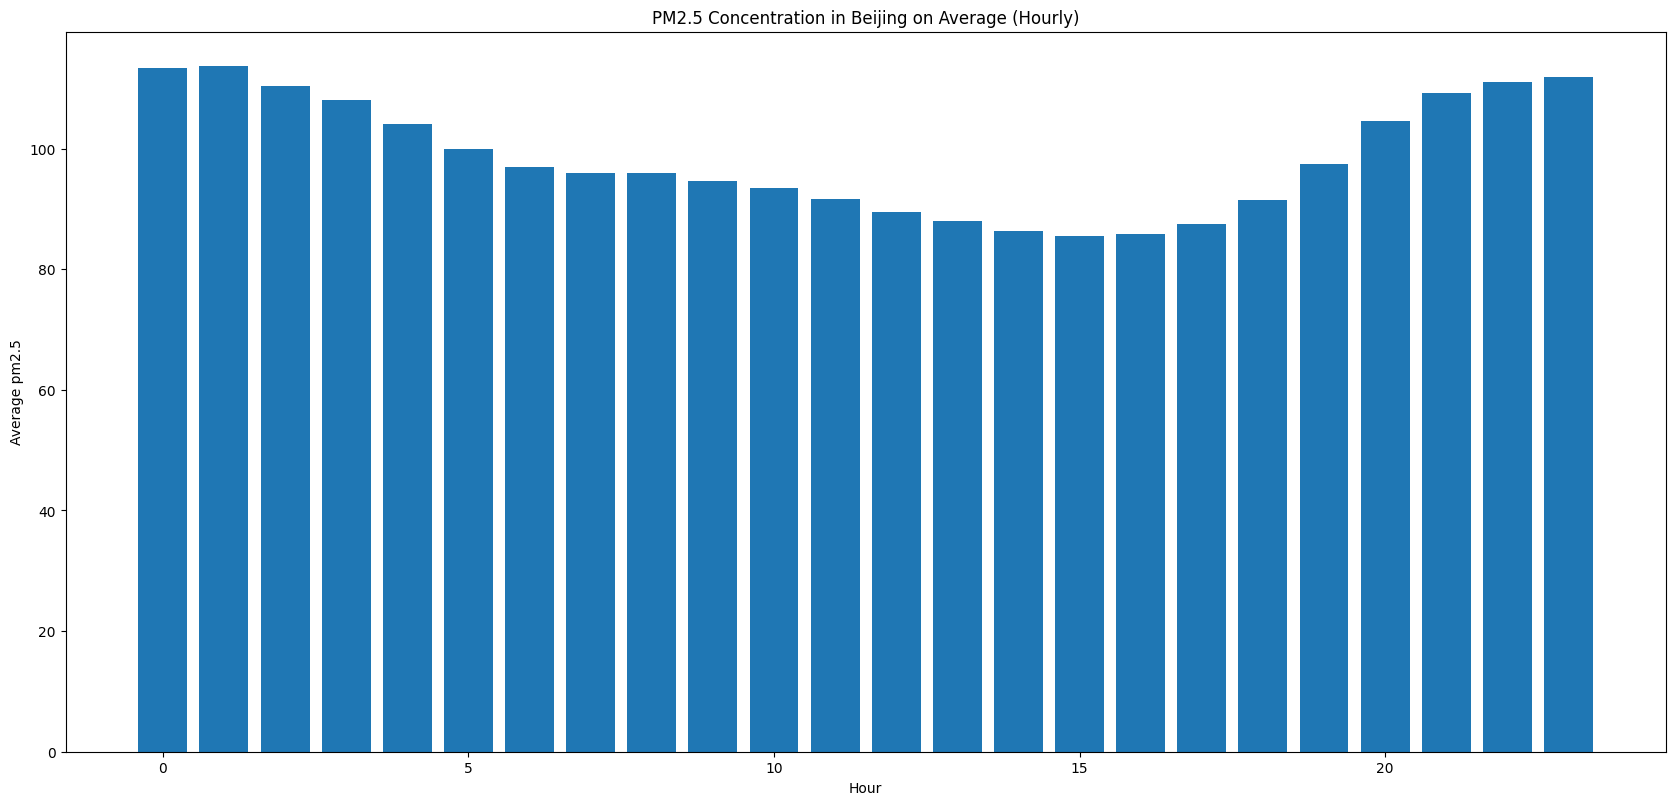

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1.5])
ax.bar(df_pm25['Date'].dt.hour.unique(),df_pm25.groupby(df_pm25['Date'].dt.hour).mean()['pm2.5'])
plt.xlabel('Hour')
plt.ylabel('Average pm2.5')
plt.title('PM2.5 Concentration in Beijing on Average (Hourly)')
plt.show()

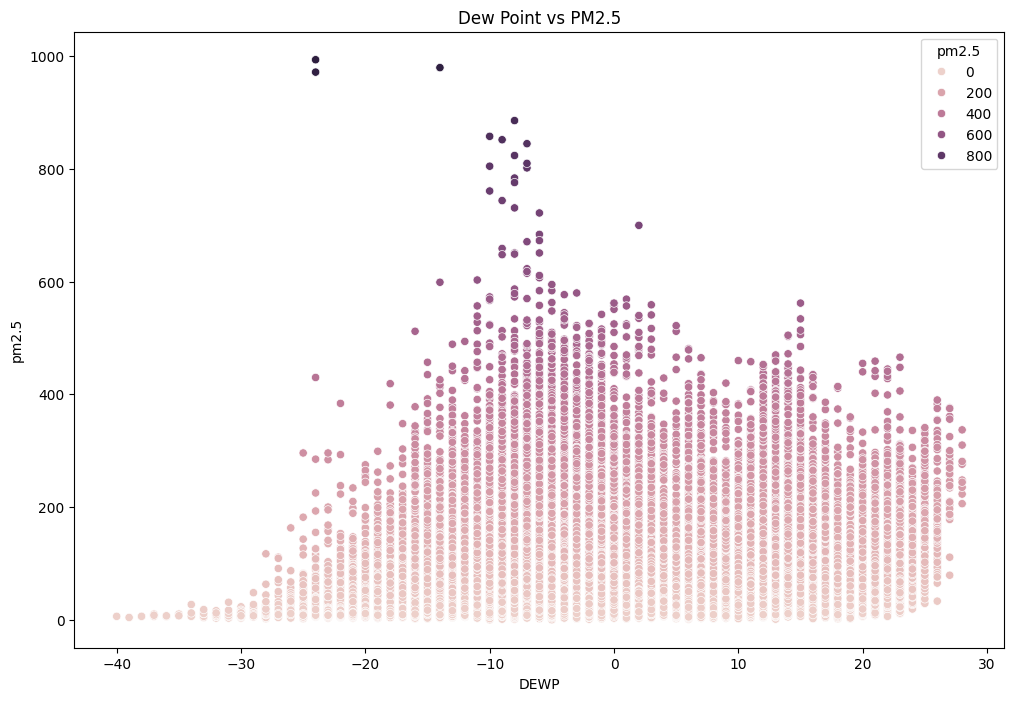

In [28]:
plt.figure(figsize=(12,8))
plt.title('Dew Point vs PM2.5')
sns.scatterplot(x="DEWP", y="pm2.5", data=df_pm25, hue = "pm2.5")
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Initialize KNN regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can try different values for n_neighbors

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the validation set
preds_knn = knn_model.predict(X_valid)

# Evaluate the model
r2 = r2_score(y_valid, preds_knn)
mae = mean_absolute_error(y_valid, preds_knn)
mse = mean_squared_error(y_valid, preds_knn)

# Print results
print(f'R² score: {r2 * 100:.2f}%')
print(f'MAE: {mae}')
print(f'MSE: {mse}')


R² score: 70.11%
MAE: 32.73156130268199
MSE: 2468.871896551724


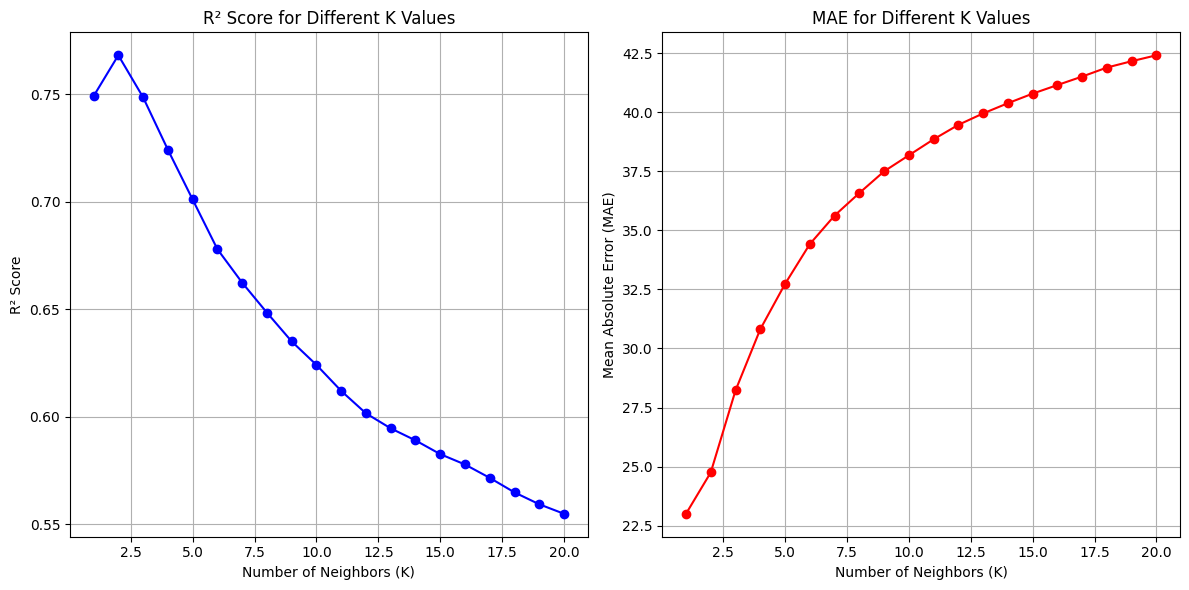

In [30]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

# List of different K values to try
k_values = range(1, 21)  # You can increase this range if needed
r2_scores = []
mae_scores = []

# Loop through K values and train a KNN model for each
for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)  # Fit model on training data
    preds = knn_model.predict(X_valid)  # Get predictions

    # Calculate R² and MAE for each value of K
    r2_scores.append(r2_score(y_valid, preds))
    mae_scores.append(mean_absolute_error(y_valid, preds))

# Plot the R² and MAE for each value of K
plt.figure(figsize=(12, 6))

# Plot R² scores
plt.subplot(1, 2, 1)
plt.plot(k_values, r2_scores, marker='o', color='b', label='R² Score')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.title('R² Score for Different K Values')
plt.grid(True)

# Plot MAE scores
plt.subplot(1, 2, 2)
plt.plot(k_values, mae_scores, marker='o', color='r', label='MAE')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Different K Values')
plt.grid(True)

plt.tight_layout()
plt.show()


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])

df_pm25.head()

<ipython-input-31-c7c92a4c171f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm25['cbwd'] = le.fit_transform(df_pm25['cbwd'])


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Date
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,2,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,2,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,2,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,2,6.25,2,0,2010-01-02 04:00:00


Simplified Decision Tree Rules (Depth 3):
|--- DEWP <= -12.50
|   |--- Iws <= 15.65
|   |   |--- DEWP <= -16.50
|   |   |   |--- month <= 1.50
|   |   |   |   |--- truncated branch of depth 19
|   |   |   |--- month >  1.50
|   |   |   |   |--- truncated branch of depth 28
|   |   |--- DEWP >  -16.50
|   |   |   |--- TEMP <= -5.50
|   |   |   |   |--- truncated branch of depth 20
|   |   |   |--- TEMP >  -5.50
|   |   |   |   |--- truncated branch of depth 27
|   |--- Iws >  15.65
|   |   |--- cbwd <= 1.50
|   |   |   |--- Iws <= 44.68
|   |   |   |   |--- truncated branch of depth 23
|   |   |   |--- Iws >  44.68
|   |   |   |   |--- truncated branch of depth 27
|   |   |--- cbwd >  1.50
|   |   |   |--- TEMP <= 4.50
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- TEMP >  4.50
|   |   |   |   |--- truncated branch of depth 11
|--- DEWP >  -12.50
|   |--- TEMP <= 4.50
|   |   |--- Iws <= 11.85
|   |   |   |--- month <= 2.50
|   |   |   |   |--- truncated branch of de

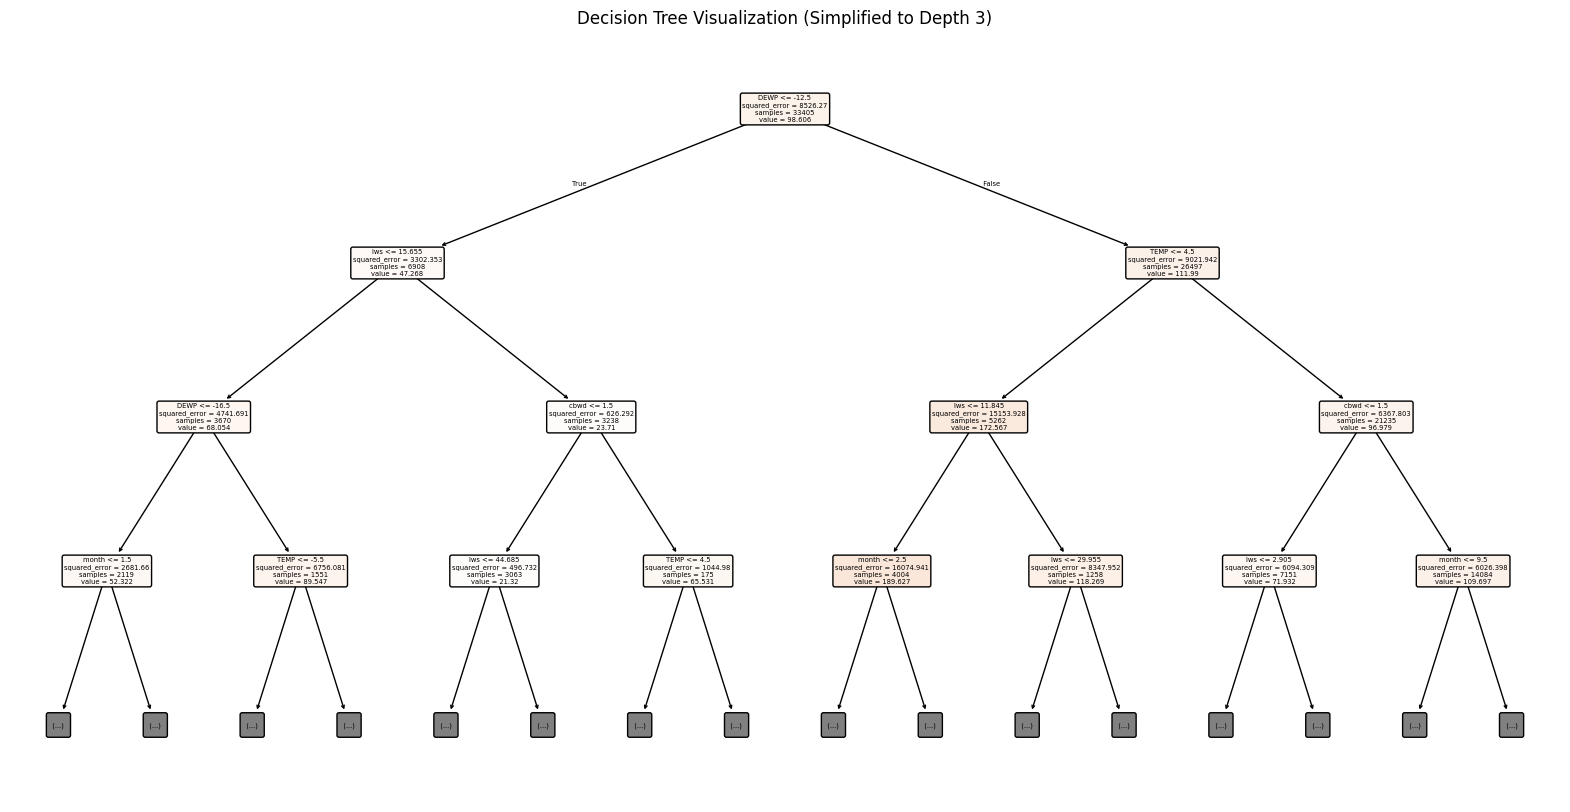

<ipython-input-32-e9db19692b87>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


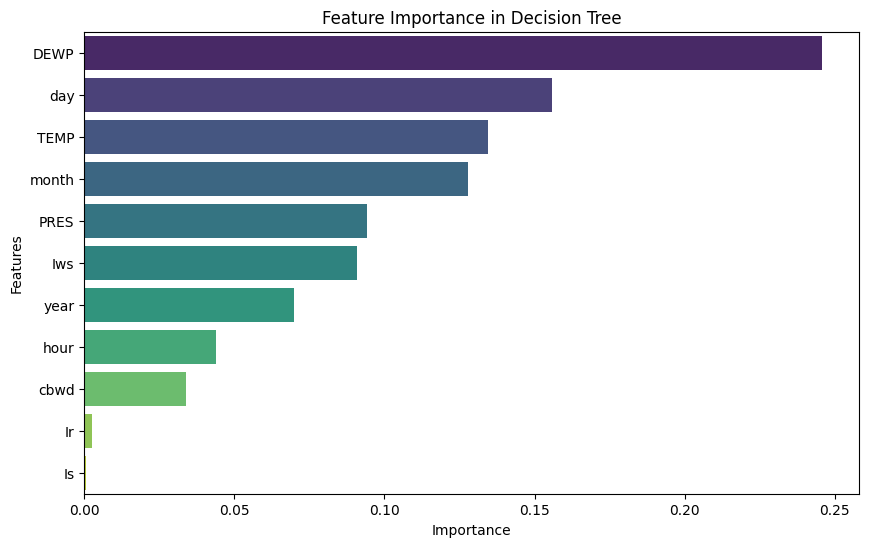

In [32]:
# Import necessary libraries
from sklearn.tree import export_text, plot_tree, DecisionTreeRegressor
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

best_model = DecisionTreeRegressor(random_state=42)  # Initialize the model
best_model.fit(X_train, y_train)  # Assuming X_train, y_train are defined

# Step 1: Limit the Depth of the Tree for Text Export
# Export the tree rules with a limited depth
tree_rules = export_text(best_model, feature_names=list(X.columns), max_depth=3)
print("Simplified Decision Tree Rules (Depth 3):")
print(tree_rules)

# Step 2: Plot the Decision Tree Visualization with Limited Depth
# Plot the tree with limited depth for better visualization
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, filled=True, rounded=True, max_depth=3)
plt.title("Decision Tree Visualization (Simplified to Depth 3)")
plt.show()

# Step 3: Visualize Feature Importance
# Get feature importances from the Decision Tree model
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


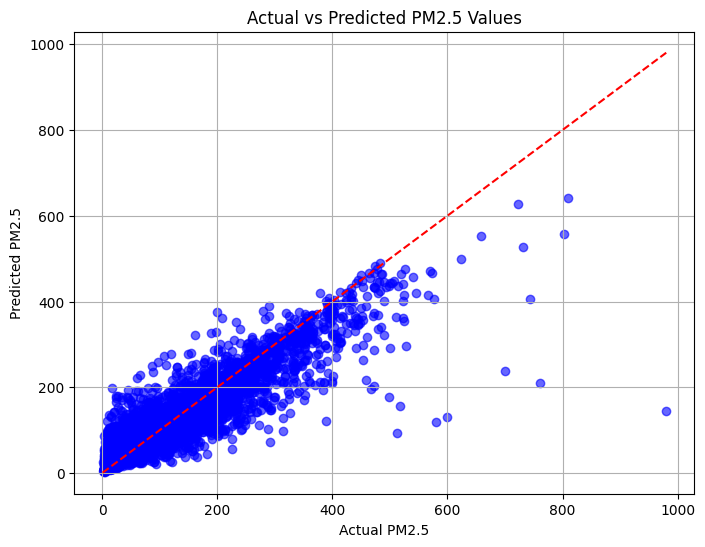

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # Assuming you want to use RandomForest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train your model (using RandomForest as an example)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get predictions
y_pred = rf_model.predict(X_test)

# Now you can plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted PM2.5 Values")
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.grid(True)
plt.show()


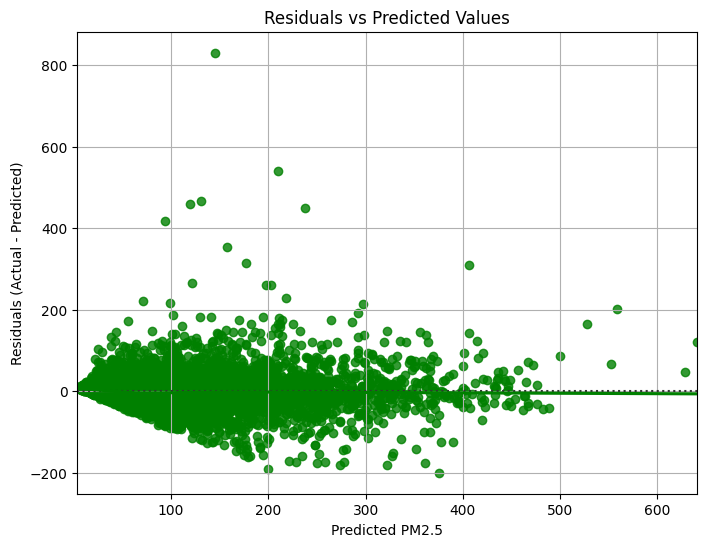

In [34]:
# Plot residuals
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='green')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted PM2.5")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


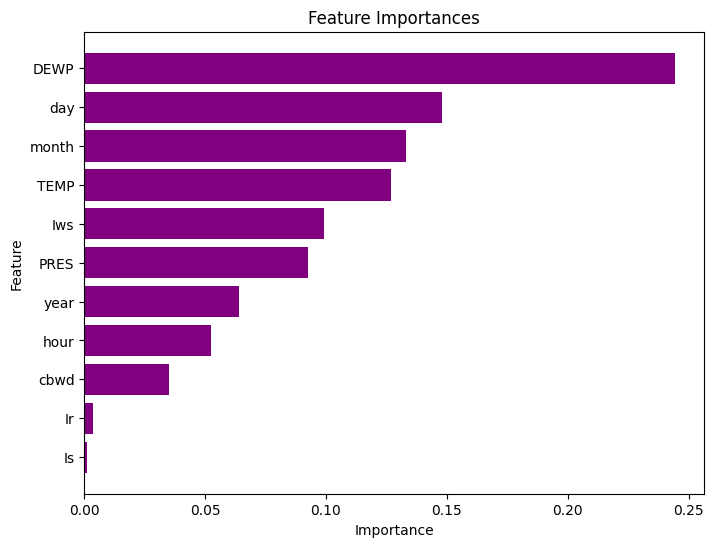

In [35]:
# Plot feature importances
importances = rf_model.feature_importances_
features = X_train.columns

# Sort feature importances in descending order
indices = importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(features[indices], importances[indices], color='purple')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


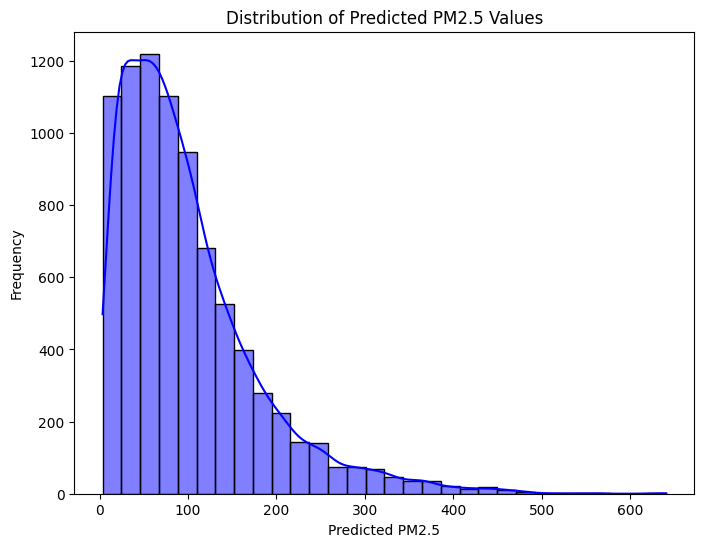

In [36]:
# Plot histogram of predictions
plt.figure(figsize=(8, 6))
sns.histplot(y_pred, kde=True, color='blue', bins=30)
plt.title("Distribution of Predicted PM2.5 Values")
plt.xlabel("Predicted PM2.5")
plt.ylabel("Frequency")
plt.show()


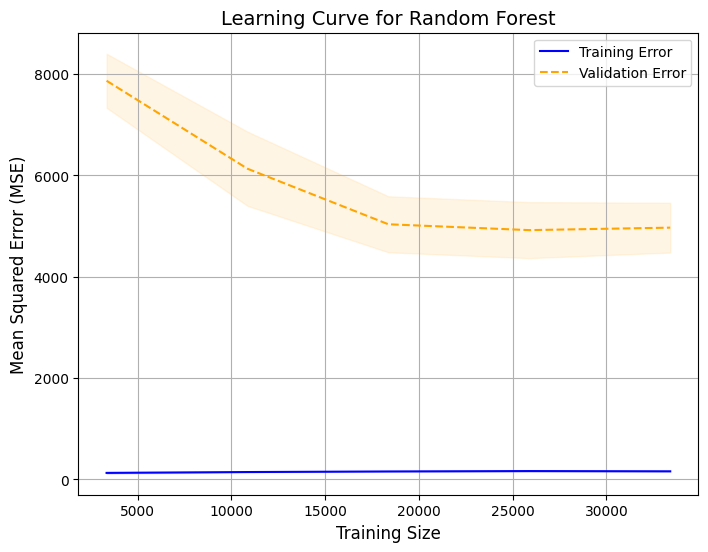

In [37]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Calculate learning curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for better readability
train_errors = -train_scores.mean(axis=1)
validation_errors = -test_scores.mean(axis=1)

# Plot learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_errors, label='Training Error', color='blue', linestyle='-')
plt.plot(train_sizes, validation_errors, label='Validation Error', color='orange', linestyle='--')

# Add error bars (optional)
plt.fill_between(train_sizes, train_errors - train_scores.std(axis=1), train_errors + train_scores.std(axis=1), color='blue', alpha=0.1)
plt.fill_between(train_sizes, validation_errors - test_scores.std(axis=1), validation_errors + test_scores.std(axis=1), color='orange', alpha=0.1)

# Add labels and title
plt.title("Learning Curve for Random Forest", fontsize=14)
plt.xlabel("Training Size", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)

# Add grid and legend
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()




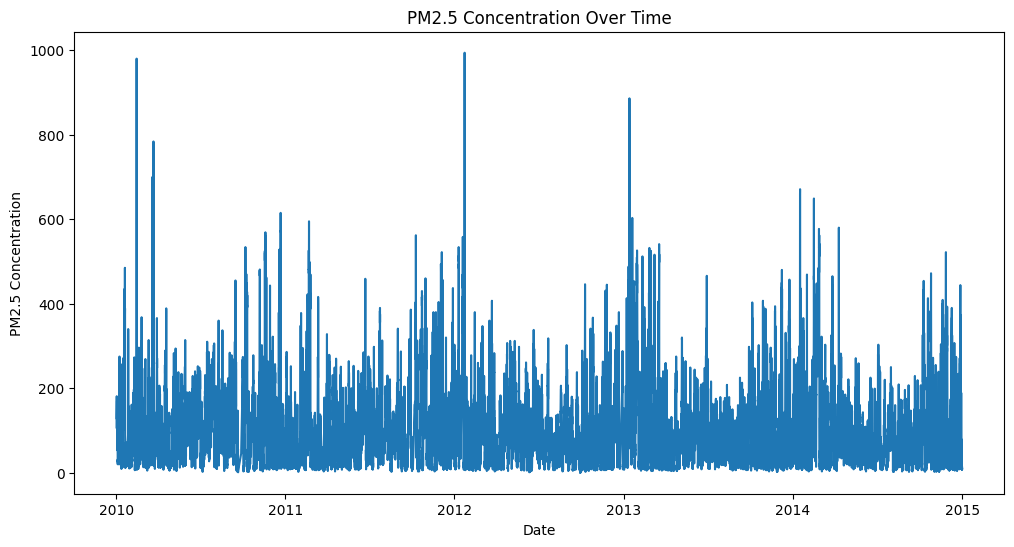

In [38]:
# @title PM2.5 Concentration Over Time

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_pm25'

plt.figure(figsize=(12, 6))
plt.plot(df_pm25['Date'], df_pm25['pm2.5'])
plt.xlabel('Date')
plt.ylabel('PM2.5 Concentration')
_ = plt.title('PM2.5 Concentration Over Time')

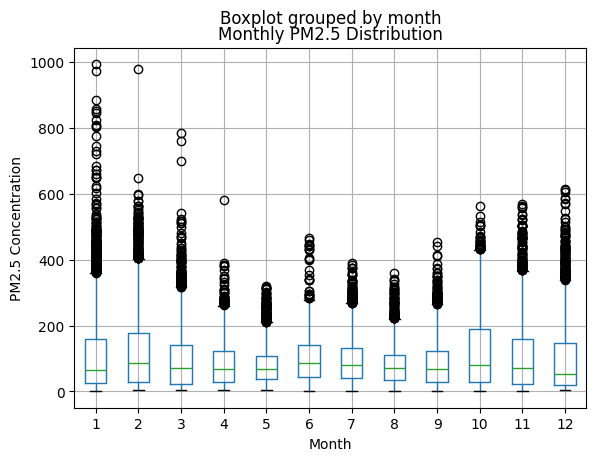

In [39]:
# @title Monthly PM2.5 Distribution

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_pm25'

df_pm25.boxplot(column='pm2.5', by='month')
plt.xlabel('Month')
plt.ylabel('PM2.5 Concentration')
_ = plt.title('Monthly PM2.5 Distribution')

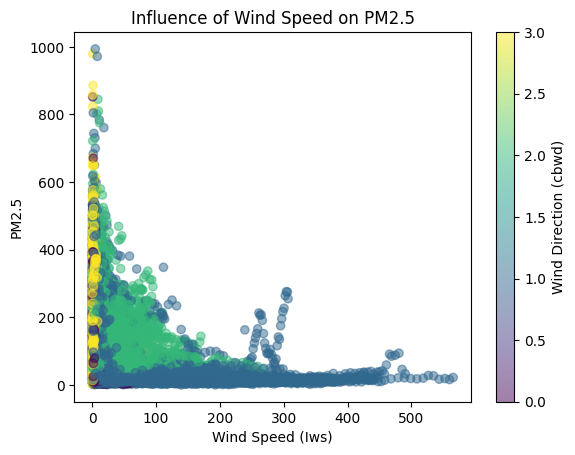

In [40]:
# @title Influence of Wind Speed on PM2.5

import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'df_pm25'

scatter = plt.scatter(df_pm25['Iws'], df_pm25['pm2.5'], c=df_pm25['cbwd'], alpha=0.5)
plt.title('Influence of Wind Speed on PM2.5')
plt.xlabel('Wind Speed (Iws)')
plt.ylabel('PM2.5')
_ = plt.colorbar(scatter, label='Wind Direction (cbwd)')